# **Autoencoder**

In [15]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.optimizers import RMSprop

In [16]:
train_data = X.values.reshape((-1, 28, 28, 1))
train_data.shape

(60000, 28, 28, 1)

In [17]:
train_data = train_data / np.max(train_data)

In [18]:
np.max(train_data), np.max(df_test)

(1.0, 1.0)

In [19]:
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [20]:
batch_size = 128
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

In [21]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [22]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [23]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=20,verbose=1,validation_data=(valid_X, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 607s 13ms/step - loss: 0.0260 - val_loss: 0.0299
Epoch 2/20
48000/48000 [==============================] - 587s 12ms/step - loss: 0.0112 - val_loss: 0.0128
Epoch 3/20
48000/48000 [==============================] - 579s 12ms/step - loss: 0.0085 - val_loss: 0.0100
Epoch 4/20
48000/48000 [==============================] - 590s 12ms/step - loss: 0.0070 - val_loss: 0.0076
Epoch 5/20
48000/48000 [==============================] - 596s 12ms/step - loss: 0.0063 - val_loss: 0.0070
Epoch 6/20
48000/48000 [==============================] - 584s 12ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 7/20
48000/48000 [==============================] - 595s 12ms/step - loss: 0.0053 - val_loss: 0.0068
Epoch 8/20
48000/48000 [==============================] - 623s 13ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 9/20
48000/48000 [==============================] - 597s 12ms/step - loss: 0.0049 - val_

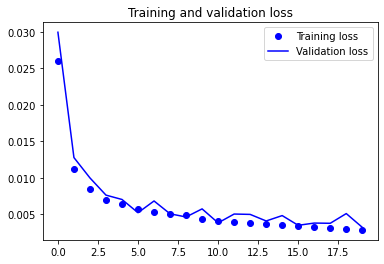

In [24]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs=20
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
autoencoder.save_weights('autoencoder.h5')
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 5), (12000, 5))

In [26]:
y_train = to_categorical(y_train)#, num_classes=5)
y_test = to_categorical(y_test)

In [27]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

In [28]:
num_classes = 5
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))
for l1,l2 in zip(full_model.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

In [29]:
autoencoder.get_weights()[0][1]
full_model.get_weights()[0][1]

array([[[-0.062201  ,  0.17172514,  0.02384764, -0.06730332,
         -0.02941872, -0.02597369,  0.05692665, -0.16313596,
          0.1179063 ,  0.07437837, -0.07830938,  0.000707  ,
         -0.01274923, -0.14409779,  0.130308  ,  0.09516284,
         -0.06940352, -0.02359379, -0.03997309,  0.04961464,
          0.1854151 ,  0.1974588 , -0.14609885,  0.0301242 ,
          0.13079807, -0.21053322,  0.07154444, -0.13529411,
          0.20681922, -0.16062474, -0.00526617,  0.16496812]],

       [[-0.05396437, -0.02862735, -0.1024141 ,  0.12771541,
          0.29083237,  0.27043656,  0.11783776,  0.01760474,
         -0.08702166,  0.10285752,  0.04249033, -0.26008114,
          0.02780943,  0.01949664, -0.13599993, -0.12262995,
          0.04245888,  0.08421975, -0.08048523,  0.11051772,
         -0.04651412, -0.10913879, -0.20299134,  0.0872888 ,
         -0.01516748,  0.08831742, -0.07239086, -0.38020942,
          0.05889232, -0.00430567, -0.06528945, -0.07659609]],

       [[ 0.164880

In [30]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [31]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
full_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        1849

In [38]:
y_train, y_test = train_test_split( Y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
classify_train = full_model.fit(x_train, y_train, batch_size=64,epochs=20,verbose=1,validation_data=(x_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 130s 3ms/step - loss: 0.4881 - accuracy: 0.8030 - val_loss: 0.4016 - val_accuracy: 0.8341
Epoch 2/20
48000/48000 [==============================] - 123s 3ms/step - loss: 0.3451 - accuracy: 0.8593 - val_loss: 0.3447 - val_accuracy: 0.8592
Epoch 3/20
48000/48000 [==============================] - 123s 3ms/step - loss: 0.2993 - accuracy: 0.8788 - val_loss: 0.3673 - val_accuracy: 0.8520
Epoch 4/20
48000/48000 [==============================] - 125s 3ms/step - loss: 0.2673 - accuracy: 0.8908 - val_loss: 0.3770 - val_accuracy: 0.8556
Epoch 5/20
48000/48000 [==============================] - 124s 3ms/step - loss: 0.2442 - accuracy: 0.9020 - val_loss: 0.4487 - val_accuracy: 0.8376
Epoch 6/20
48000/48000 [==============================] - 132s 3ms/step - loss: 0.2181 - accuracy: 0.9118 - val_loss: 0.3926 - val_accuracy: 0.8593
Epoch 7/20
48000/48000 [==============================] - 123s

In [41]:
test_eval = full_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6015552995701631
Test accuracy: 0.8650833368301392


In [42]:
predicted_classes = full_model.predict(df_test)

In [43]:
from sklearn import metrics

cnn_pred_mnist = full_model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)



specificity1 = cnn_cm_mnist[1,1]/(cnn_cm_mnist[1,0]+cnn_cm_mnist[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import recall_score
print('Sensitivity is',recall_score(y_true, cnn_pred_mnist,average='micro'))
print('Recall is',recall_score(y_true, cnn_pred_mnist,average='micro'))

from sklearn.metrics import precision_score
print('Precision score is',precision_score(y_true, cnn_pred_mnist,average='micro'))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_true, cnn_pred_mnist))
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_true, cnn_pred_mnist))


-----------------Convolutional Neural Network Report---------------
F1 score: 0.865613892111646
Accuracy score: 0.8650833333333333
Confusion matrix: 
 [[2184  176   19    0    0]
 [  84 2084  200   53    3]
 [  13  166 1854  301   30]
 [   0   27  149 2035  156]
 [   2   12   25  203 2224]]
Specificity :  0.9612546125461254
Sensitivity is 0.8650833333333333
Recall is 0.8650833333333333
Precision score is 0.8650833333333333
MSE 0.18916666666666668
MAE 0.15183333333333332


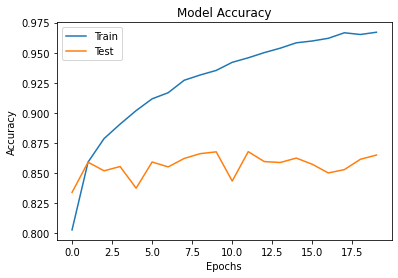

In [44]:
from keras.callbacks import History
plt.plot(classify_train.history['accuracy'])
plt.plot(classify_train.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

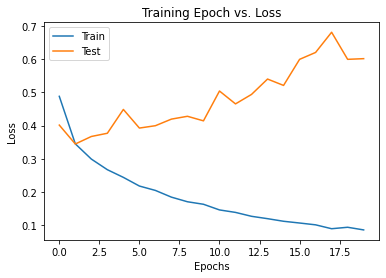

In [45]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(classify_train.history['loss'])
plt.plot(classify_train.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()